### Oppstart


In [1]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
from dhlab.module_update import css
import networkx as nx
%matplotlib inline

In [2]:
css()

In [3]:
plot = lambda x, lw=5: x.plot(figsize=(10,5), lw=lw)

In [4]:
import warnings
warnings.filterwarnings('ignore')

# N-gramdata

Data kan hentes fra [NB N-gram](https://www.nb.no/sp_tjenester/beta/ngram_1/trends#ngram/query?terms=demokrati%2C+diktatur&lang=all&case_sens=0&freq=rel&corpus=bok) med kommandoen `nb_ngram(<ord>, periode)`. Dataene utgjør en **dataramme** som kan analyseres og plottes

In [5]:
nb.nb_ngram('han, hun', smooth=1, years=(1950, 1990)).head(10)

,han,hun
1950,1.019108,0.355012
1951,1.026575,0.337322
1952,0.970808,0.340458
1953,0.951532,0.311137
1954,0.787041,0.281906
1955,0.753244,0.234209
1956,0.693097,0.212321
1957,0.672339,0.198300
1958,0.696554,0.213855
1959,0.876191,0.286295


## Plotting

Lag en figur med egendefinert (se over) kommando `plot(<ngram dataramme>)` eller bruk innebygd Python `<ngram>.plot(...)`

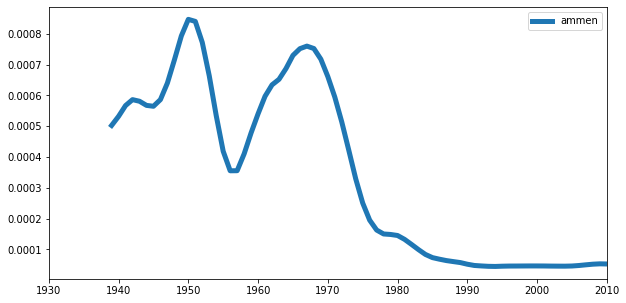

In [6]:
plot(nb.nb_ngram("ammen", smooth=10, years=(1930, 2010)));

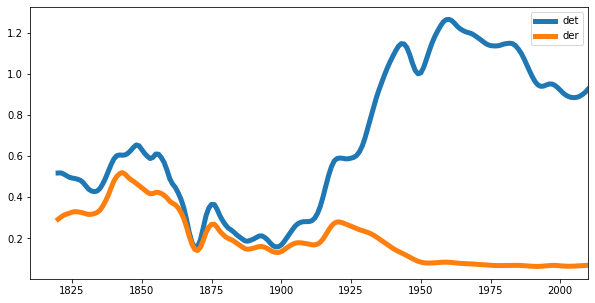

In [7]:
plot(nb.nb_ngram("det, der", smooth=10, corpus='avis', years=(1810, 2010)));

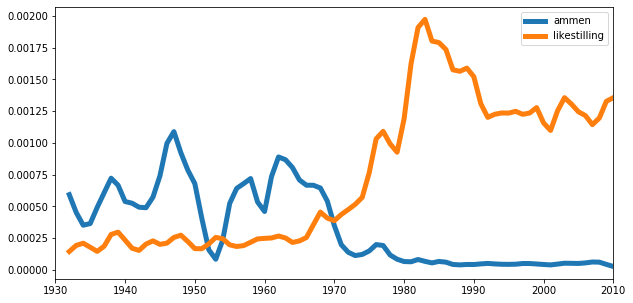

In [9]:
plot(nb.nb_ngram("ammen, likestilling", smooth=3, years=(1930, 2010)));

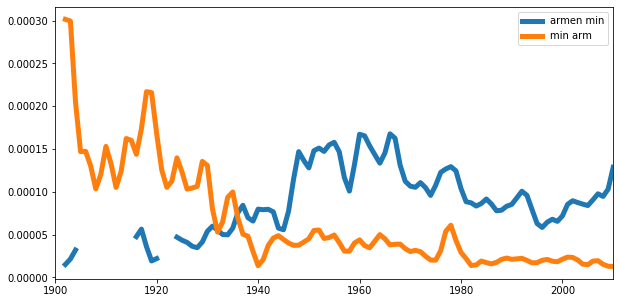

In [10]:
plot(nb.nb_ngram("armen min, min arm", smooth=3, years=(1900, 2010)));

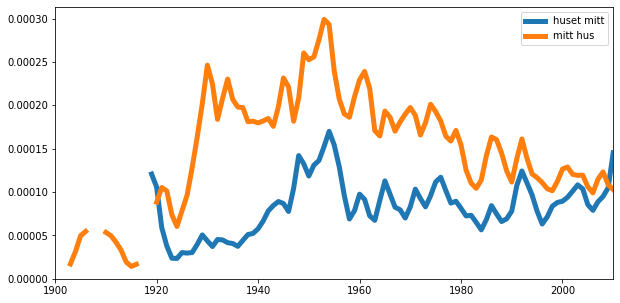

In [11]:
plot(nb.nb_ngram("huset mitt, mitt hus", smooth=3, years=(1900, 2010)));

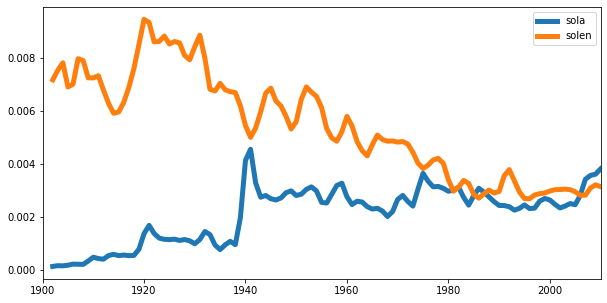

In [12]:
plot(nb.nb_ngram("sola, solen", smooth=3, years=(1900, 2010)));

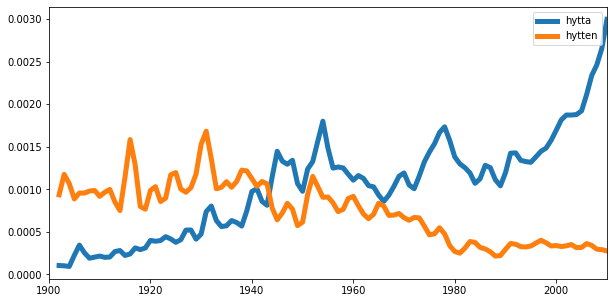

In [13]:
plot(nb.nb_ngram("hytta, hytten", smooth=3, years=(1900, 2010)));

In [ ]:
plot(nb.nb_ngram("ammen, likestilling", smooth=3, years=(1850, 2010)));

## N-gram med jokertegn

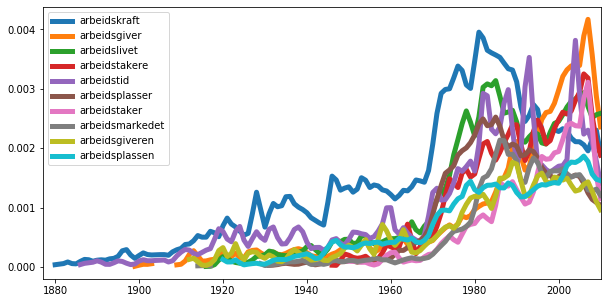

In [14]:
plot(nb.nb_ngram("arbeids*"));

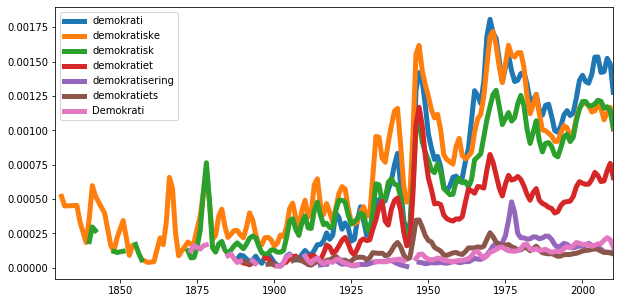

In [15]:
plot(nb.nb_ngram('demokrati*'));

# Galakser


Galaksene måler koblinger mellom ord, og kan brukes for å lage sett av ord til forskjellige formål, som for eksempel sentimentanalyse, eller stedsnavn.

For engelsk og tysk er grunnlagsmaterialet [Google n-gram](https://books.google.com/ngrams/graph?content=democracy&year_start=1800&year_end=2000&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Cdemocracy%3B%2Cc0).

Kommanden er `make_graph(<ord>, lang=<språk-kode>)`

## Definer koblinger til *is*

I eksemplet ser vi på **is**, sjekk [Bokmålsordboka](https://ordbok.uib.no/perl/ordbok.cgi?OPP=is&ant_bokmaal=5&ant_nynorsk=5&begge=+&ordbok=begge) om ordet.

In [25]:
g_is = nb.make_graph('is', cutoff=12, lang='nob')

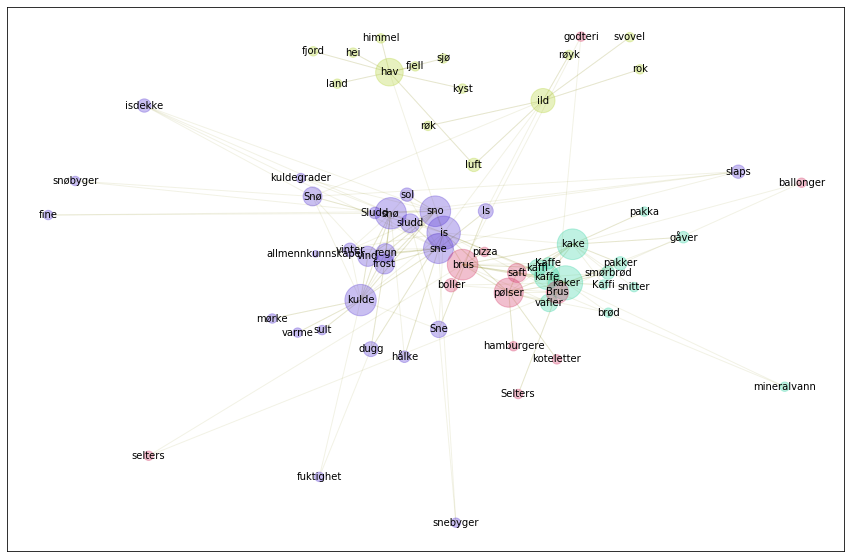

In [26]:
gnl.show_graph(g_is, spread=1.2)

In [27]:
gnl.show_communities(g_is)

hav-ild :  hav, ild, luft, fjell, røyk, hei, himmel, kyst, røk, fjord, svovel, land, sjø, rok

kaker-kake :  kaker, kake, kaffe, saft, vafler, kaffi, pakker, smørbrød, gåver, Kaffe, brød, mineralvann, Kaffi, snitter, pakka

snø-kulde :  snø, kulde, sno, sne, vind, frost, Snø, sludd, regn, Sne, Is, sol, vinter, isdekke, slaps, hålke, Sludd, snøbyger, sult, kuldegrader, fine, snebyger, fuktighet, mørke, varme

is-brus :  is, brus, pølser, Brus, dugg, boller, pizza, godteri, selters, hamburgere, Selters, koteletter, ballonger, allmennkunnskaper



# Hva med andre ord og betydningsvarianter?

In [40]:
test = nb.make_graph('tog', cutoff=20)

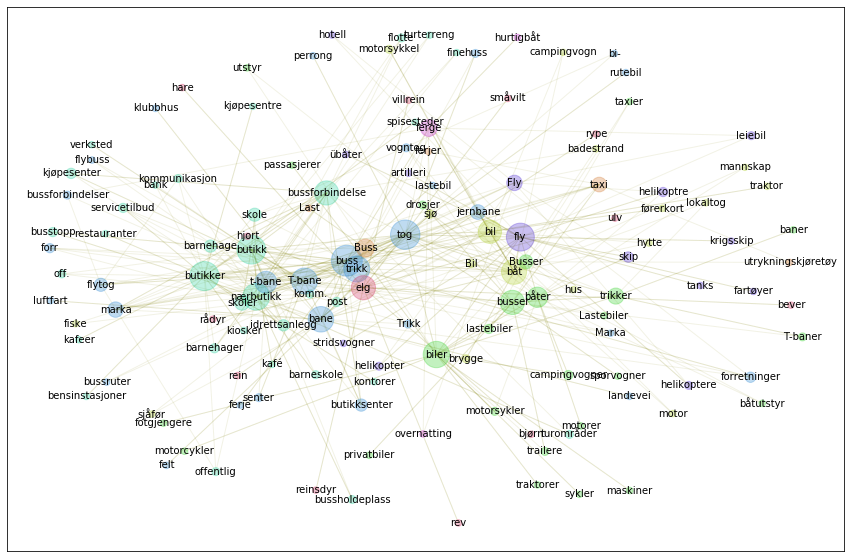

In [42]:
gnl.show_graph(test, spread=2)

In [43]:
gnl.show_communities(test)

båt-bil :  båt, bil, motorsykkel, brygge, Bil, sjø, mannskap, traktor, hytte, lokaltog, hus, motor, fiske, badestrand, sjåfør, campingvogn, førerkort

biler-busser :  biler, busser, båter, trikker, Busser, lastebiler, campingvogner, T-baner, drosjer, trailere, motorsykler, maskiner, sykler, Lastebiler, baner, fotgjengere, sporvogner, motorer, privatbiler, båtutstyr, utstyr, motorcykler, taxier, passasjerer, traktorer

butikker-butikk :  butikker, butikk, nærbutikk, bussforbindelse, skoler, skole, barnehage, idrettsanlegg, kjøpesenter, busstopp, post, servicetilbud, barnehager, flotte, offentlig, turområder, barneskole, kommunikasjon, bussholdeplass, komm., off., verksted, kjøpesentre, kafeer, turterreng, bank, spisesteder, fine, kiosker, kontorer, kafé, restauranter, bensinstasjoner

buss-tog :  buss, tog, trikk, T-bane, bane, t-bane, marka, jernbane, flytog, butikksenter, forretninger, forr, bussforbindelser, vogntog, senter, huss, Trikk, flybuss, rutebil, ferje, landevei, perrong, bi